In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skl2onnx import to_onnx
from onnxruntime import InferenceSession
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the data
data_path = "filled_data.csv"
data = pd.read_csv(data_path)

# Extract the relevant columns
datetime_column = pd.to_datetime(data['datetime'])

target_columns = data['kw_total_zone2']  

df_target = pd.DataFrame({'datatime': datetime_column, 'target': target_columns})



In [3]:
# Create lag targets
for i in range(1, 169):
    df_target[f'lag_{i}'] = df_target['target'].shift(i)
# Drop rows with NaN values created by shifting
df_target.dropna(inplace=True)

# Splitting the dataset
X = df_target[[f'lag_{i}' for i in range(1, 169)]]
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize scaler for X
scaler_X = MinMaxScaler(feature_range=(0, 1))
# Fit on training data and transform it
X_train_scaled = scaler_X.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler_X.transform(X_test)

# # Optionally, initialize and apply a scaler for y if necessary
# scaler_y = MinMaxScaler(feature_range=(0, 1))
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
# y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).

# Now X_train_scaled, X_test_scaled, y_train_scaled, and y_test_scaled are ready for model training


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23596\1746179889.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_target[f'lag_{i}'] = df_target['target'].shift(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23596\1746179889.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_target[f'lag_{i}'] = df_target['target'].shift(i)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23596\1746179889.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [4]:
df_target

,datatime,target,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,...,lag_159,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168
168,2022-01-08 00:00:00+00:00,1.843,1.754,1.825,1.860,1.936,2.179,5.057,6.338,5.097,...,2.588,2.599,2.557,2.578,2.564,2.952,2.539,2.501,2.504,2.308
169,2022-01-08 01:00:00+00:00,1.783,1.843,1.754,1.825,1.860,1.936,2.179,5.057,6.338,...,2.588,2.588,2.599,2.557,2.578,2.564,2.952,2.539,2.501,2.504
170,2022-01-08 02:00:00+00:00,1.843,1.783,1.843,1.754,1.825,1.860,1.936,2.179,5.057,...,2.606,2.588,2.588,2.599,2.557,2.578,2.564,2.952,2.539,2.501
171,2022-01-08 03:00:00+00:00,1.865,1.843,1.783,1.843,1.754,1.825,1.860,1.936,2.179,...,2.917,2.606,2.588,2.588,2.599,2.557,2.578,2.564,2.952,2.539
172,2022-01-08 04:00:00+00:00,1.919,1.865,1.843,1.783,1.843,1.754,1.825,1.860,1.936,...,2.572,2.917,2.606,2.588,2.588,2.599,2.557,2.578,2.564,2.952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2023-12-31 19:00:00+00:00,2.058,2.026,2.029,2.073,2.070,2.056,2.132,2.583,5.817,...,3.529,2.119,3.803,2.719,2.105,2.074,2.075,2.117,2.144,2.132
17516,2023-12-31 20:00:00+00:00,2.038,2.058,2.026,2.029,2.073,2.070,2.056,2.132,2.583,...,5.551,3.529,2.119,3.803,2.719,2.105,2.074,2.075,2.117,2.144
17517,2023-12-31 21:00:00+00:00,2.049,2.038,2.058,2.026,2.029,2.073,2.070,2.056,2.132,...,2.779,5.551,3.529,2.119,3.803,2.719,2.105,2.074,2.075,2.117
17518,2023-12-31 22:00:00+00:00,2.021,2.049,2.038,2.058,2.026,2.029,2.073,2.070,2.056,...,3.878,2.779,5.551,3.529,2.119,3.803,2.719,2.105,2.074,2.075


### Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model selection and training
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)

# Evaluation
predictions_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
print(f'RMSE: {rmse_rf}')

RMSE: 0.7843570251502591


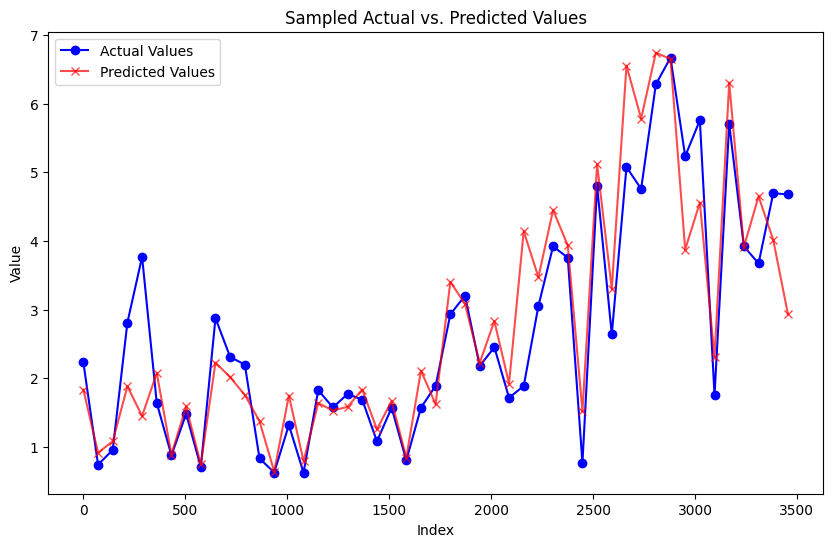

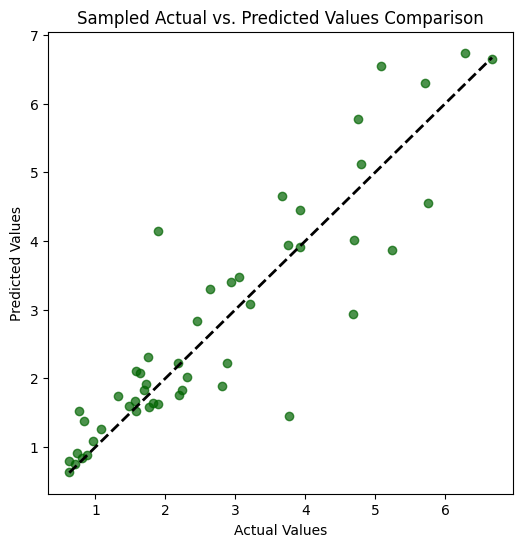

In [6]:
# Define the step size
step = 72

# Sample the data
indices = np.arange(len(y_test))[::step]
sampled_y_test = y_test.reset_index(drop=True).iloc[indices]
sampled_predictions = predictions_rf[indices]

# Plotting sampled actual vs predicted values
plt.figure(figsize=(10, 6))

# Line plot for sampled actual values
plt.plot(indices, sampled_y_test, label='Actual Values', color='blue', marker='o')

# Line plot for sampled predicted values
plt.plot(indices, sampled_predictions, label='Predicted Values', color='red', alpha=0.7, marker='x')

plt.title('Sampled Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Scatter plot for sampled actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(sampled_y_test, sampled_predictions, alpha=0.7, color='darkgreen')
plt.title('Sampled Actual vs. Predicted Values Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting a perfect prediction line
plt.plot([sampled_y_test.min(), sampled_y_test.max()], [sampled_y_test.min(), sampled_y_test.max()], 'k--', lw=2)

plt.show()

### LSTM

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [8]:
X_train_scaled.shape

(13881, 168)

In [13]:
# Reshape input data from [samples, features] to [samples, timesteps, features]
# Here, we have 168 timesteps and 1 feature per timestep
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

print(X_train_reshaped.shape)

(13881, 168, 1)


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))  # 168 timesteps, 1 feature
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [15]:
history = model.fit(X_train_reshaped, y_train, epochs=75, batch_size=18, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)



Epoch 1/75
772/772 - 36s - loss: 2.5404 - val_loss: 2.4036 - 36s/epoch - 47ms/step
Epoch 2/75
772/772 - 35s - loss: 2.5247 - val_loss: 2.1357 - 35s/epoch - 45ms/step
Epoch 3/75
772/772 - 34s - loss: 2.0039 - val_loss: 1.8294 - 34s/epoch - 44ms/step
Epoch 4/75
772/772 - 41s - loss: 1.8544 - val_loss: 1.8187 - 41s/epoch - 53ms/step
Epoch 5/75
772/772 - 42s - loss: 1.9474 - val_loss: 1.9095 - 42s/epoch - 55ms/step
Epoch 6/75
772/772 - 42s - loss: 1.8628 - val_loss: 1.9602 - 42s/epoch - 55ms/step
Epoch 7/75
772/772 - 42s - loss: 1.8877 - val_loss: 1.7991 - 42s/epoch - 54ms/step
Epoch 8/75
772/772 - 42s - loss: 1.9065 - val_loss: 1.7117 - 42s/epoch - 55ms/step
Epoch 9/75
772/772 - 42s - loss: 2.1579 - val_loss: 2.0574 - 42s/epoch - 54ms/step
Epoch 10/75
772/772 - 42s - loss: 2.0785 - val_loss: 1.7865 - 42s/epoch - 55ms/step
Epoch 11/75
772/772 - 44s - loss: 1.8352 - val_loss: 1.7947 - 44s/epoch - 56ms/step
Epoch 12/75
772/772 - 43s - loss: 1.8675 - val_loss: 1.6935 - 43s/epoch - 55ms/step
E

In [16]:
from sklearn.metrics import mean_squared_error

# Make predictions
predictions = model.predict(X_test_reshaped)

# Optionally, inverse transform predictions if you've scaled y
# predictions = scaler_y.inverse_transform(predictions)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')


109/109 [==============================] - 3s 26ms/step
RMSE: 1.1032689510726796


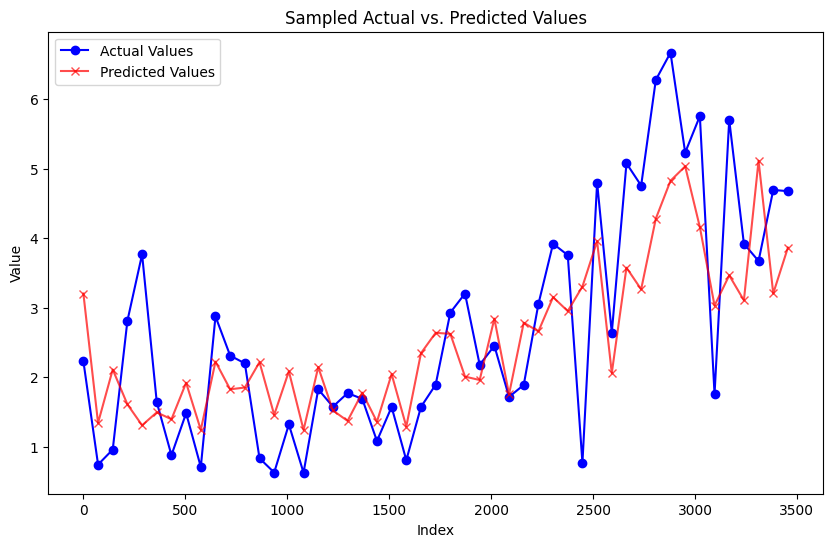

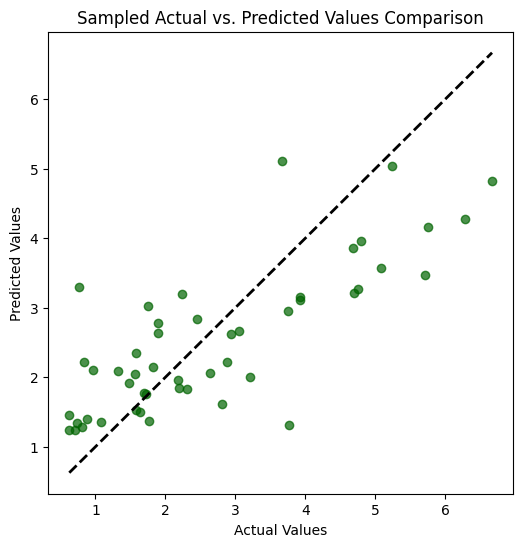

In [17]:
# Define the step size
step = 72

# Sample the data
indices = np.arange(len(y_test))[::step]
sampled_y_test = y_test.reset_index(drop=True).iloc[indices]
sampled_predictions = predictions[indices]

# Plotting sampled actual vs predicted values
plt.figure(figsize=(10, 6))

# Line plot for sampled actual values
plt.plot(indices, sampled_y_test, label='Actual Values', color='blue', marker='o')

# Line plot for sampled predicted values
plt.plot(indices, sampled_predictions, label='Predicted Values', color='red', alpha=0.7, marker='x')

plt.title('Sampled Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

# Scatter plot for sampled actual vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(sampled_y_test, sampled_predictions, alpha=0.7, color='darkgreen')
plt.title('Sampled Actual vs. Predicted Values Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plotting a perfect prediction line
plt.plot([sampled_y_test.min(), sampled_y_test.max()], [sampled_y_test.min(), sampled_y_test.max()], 'k--', lw=2)

plt.show()